# Oct_07_2022 save format

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Save-format" data-toc-modified-id="Save-format-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Save format</a></span></li><li><span><a href="#Method" data-toc-modified-id="Method-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Method</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Experiments</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Appendix</a></span></li><li><span><a href="#Reference:" data-toc-modified-id="Reference:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Reference:</a></span></li></ul></div>

## Introduction

CSV provides enormous flexibility in data reading writing previewsing etc.. But, we have another option to save the data in a few time-efficient ans storage-optimized way . 


## Save format 
Pandas offers a variety of file formats:
- Csv — a good old friend of a data scientist
- pickle — a Python’s way to serialize things
- parquet — an Apache Hadoop’s columnar storage format
- feather — a fast, lightweight, and easy-to-use binary file format for storing data frames
- Json — data interchange format that uses human-readable
- HDF5 — a file format designed to store and organize large amounts of data

## Method 

```python 
import feather
import pandas as pd

df.to_csv('example.csv')
csv_file = pd.read_csv('example.csv')

df.to_pickle('example.pkl')
pickel_file = pd.read_pickle('example.pkl')

df.to_json('example.json')
pickel_file = pd.read_json('example.pkl')

df.to_feather('example.feather')
feathre_file = feather.read_dataframe('example.feather')

```

## Experiments 

In [1]:
################################
# Install package Linux os has problem when install the feather format... 
# Be careful. 
################################
# !conda install -c conda-forge feather-format -y

In [2]:
# package load 
import os
import feather
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
# user-defined function
from utils import *

In [3]:
formats = [
    ('csv', {'index': None}),
    ('hdf', {'key': 'data', 'format': 'table'}),
    ('pickle',),
    ('feather',),
    ('json',),
    ('parquet', {'engine': 'pyarrow'})
]

In [4]:
results = benchmark(formats)

Benchmarking round Done ...


In [5]:
results['save+load_time'] = results['save_time'] + results['load_time']
avg = results.groupby('format').mean().reset_index().drop(columns=['run_no'])
avg

,format,size_mb,save_ram_delta_mb,save_time,load_ram_delta_mb,load_time,save+load_time
0,csv,76.792,0.039062,2.533713,43.710938,0.596289,3.130002
1,feather,22.530,57.746094,0.079764,48.609375,0.115485,0.195249
2,hdf,63.890,116.909375,0.790144,315.114062,0.919197,1.709341
3,json,94.206,165.530469,0.854208,502.117969,1.250688,2.104896
4,parquet,15.034,71.787500,0.216524,121.062500,0.140009,0.356533
5,pickle,64.876,151.047656,0.573052,103.292969,0.234913,0.807965


## Results

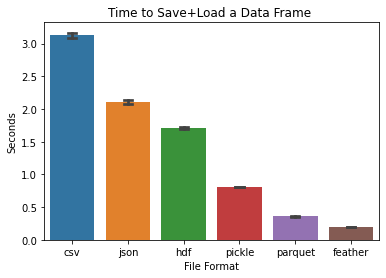

In [6]:
ax = sns.barplot(x='format', y='save+load_time',
                 data=results.sort_values('save+load_time',ascending=False),
                 ci=95,capsize=.15,)
_ = ax.set_xlabel('File Format')
_ = ax.set_ylabel('Seconds')
_ = ax.set_title('Time to Save+Load a Data Frame ')

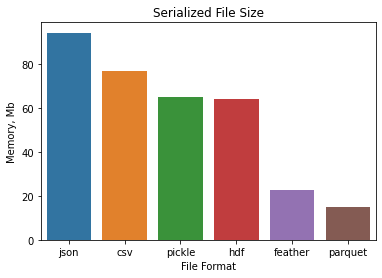

In [7]:
ax = sns.barplot(x='format', y='size_mb',
                 data=avg.sort_values('size_mb', ascending=False))
_ = ax.set_ylabel('Memory, Mb')
_ = ax.set_xlabel('File Format')
_ = ax.set_title('Serialized File Size')
plt.show()

## Conclusion 

- `CSV` is essentially a text file. It allows us to easy view of data
- `Feather` format is an ideal candiate to store data. but, [feather format is not expected to be used as a long-term file storage.](https://stackoverflow.com/questions/48083405/what-are-the-differences-between-feather-and-parquet)
- If you save the data like Pythonic way then use `Pickle`. 

## Appendix 

When we used Torch framework, we usually build `dataset and dataloader` and lots of augmentation method apply to our data. This approach is not time-efficient. 
Therefore, we can save our dataset as an `.pt` format and it can save our time to load the data.  
Please check... 

## Reference: 
- https://github.com/devforfu/pandas-formats-benchmark/blob/master/benchmark.ipynb